In [725]:
import numpy as np
import matplotlib.pyplot as plt

## Open a test set file
let try to open a file

In [171]:
file = open('testSet.txt')
lines = file.readlines()
line1 = lines[1].strip().split('\t')
a =list()
c=list(map(float, line1))
a.append(c)
a

[[-3.453687, 3.424321]]

define a funtion to open it

In [580]:
def load_data_set(file_name):
    data = list()
    file = open(file_name)
    for line in file.readlines():
        cur_line = line.strip().split('\t')
        data.append(list(map(float, cur_line)))
    return np.array(data)

In [728]:
datas = load_data_set('testSet.txt')

In [729]:
datas[:5]

array([[ 1.658985,  4.285136],
       [-3.453687,  3.424321],
       [ 4.838138, -1.151539],
       [-5.379713, -3.362104],
       [ 0.972564,  2.924086]])

## Calculation distance

In [185]:
c = np.array([[1,1]])
a = datas - c
a[:5]
(a**2)[:5].sum()

119.731012287973

In [ ]:
def distance_singe(x, y):
    (((x - y)**2).sum()**0.5).sum

In [316]:
def distance(datas, centroids, singe=True):
    if singe is True:
        return (((datas - centroids)**2).sum())**0.5
    else:
        k = len(centroids)
        dis = 0
        for i in range(k):
            distances = datas - centroids[i]
            dis += ((distances**2).sum(axis = 1)**0.5).sum()
        return dis

In [317]:
distance(np.array([[0,0]]), np.array([[1,1], [2,3]]), singe=False)

5.0197648378370845

## Init random centroids

In [318]:
def rand_cen(datas, k):
    n = np.shape(datas)[1]
    centroids = np.zeros([k, n])
    for j in range(n):
        minJ = datas[:, j].min()
        rangJ = float(datas[:, j].max() - minJ)
        centroids[:, j] = minJ + rangJ * np.random.rand(k) #get a random value from min to max
    return centroids

In [408]:
centroids = rand_cen(datas, 4)

In [409]:
centroids

array([[-2.72176538,  2.19602964],
       [-1.56858288, -4.22343174],
       [-4.59911908,  0.58233158],
       [ 4.60341045,  2.01376751]])

In [320]:
distance(datas, centroids, singe=False)

807.70400172923235

In [321]:
distance(datas[0], datas[1])

5.184632816681332

In [322]:
distance(np.array([0,0]), np.array([1,1]))

1.4142135623730951

## Review the data

In [724]:
datas[:, 0]

array([ 3.275154, -3.344465,  0.355083,  1.852435, -2.078973, -0.993756,
        2.682252, -3.087776, -1.565978,  2.441611, -0.659487, -0.459601,
        2.17768 , -2.920969, -0.028814,  3.625746, -3.912363, -0.551694,
        2.855808, -3.594448,  0.421993,  1.650821, -2.082902, -0.718809,
        4.513623, -4.822011, -0.656297,  1.919901, -3.287749, -1.576936,
        3.598143, -3.977329, -1.79108 ,  3.914654, -1.910108, -1.226597,
        1.148946, -2.113864,  0.845762,  2.629062, -1.640717, -1.881012,
        4.606999, -4.366462,  0.765015,  3.121904, -4.025139, -0.559558,
        4.376754, -1.874308, -0.089337,  3.997787, -3.082978,  0.845235,
        1.327224, -2.889949, -0.966018,  2.960769, -3.275518,  0.639276])

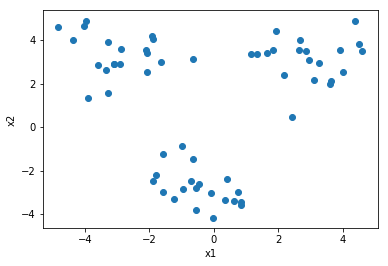

In [726]:
plt.figure()
figure = plt.subplot(111)
figure.scatter(datas[:, 0], datas[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## K mean algorithm function

In [745]:
def k_means(dataset, k, dis_meas=distance, cen_init=rand_cen, maxstep=1000, debug=False):
    m = np.shape(dataset)[0]
    centroids = cen_init(dataset, k)
    #print('init centroids:\n', centroids)
    clusterAssment = np.zeros([m, 2]) #[[clusterIndex, distance],...]
    cluster_change = True
    step_num = 0
    while cluster_change and step_num < maxstep: 
        cluster_change = False
        step_num += 1
        for i in range(m): # calculation for every sample
            min_dis = np.inf
            min_index = -1
            for j in range(k): # find the min distance among k clusters
                disIJ = dis_meas(dataset[i], centroids[j])
                if disIJ < min_dis:
                    min_index = j
                    min_dis = disIJ
            if clusterAssment[i, 0] != min_index:
                cluster_change = True
            clusterAssment[i] = np.array([min_index, min_dis])
        for j in range(k): # updata clusters
            centroids[j,:] = dataset[clusterAssment[:, 0] == j].mean(axis=0)
        if debug:
            print('step: {}, distance:{}'.format(step_num, clusterAssment[:,1].sum()))
    #print('return when step = ',step_num)
    #print('\n', 'centroids:\n', centroids)
    #print('distance:\n', clusterAssment[:,1].sum(), '\n')
    return centroids, clusterAssment

## run k mean for the test data

In [734]:
k=3
datas = load_data_set('testSet2.txt')
centroids, clusterAssment = k_means(datas, k, maxstep=100)

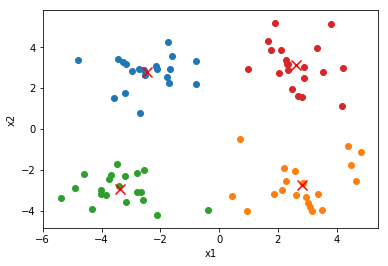

In [782]:
def plot_cluster_2d(datas, clusterAssment, centroids):
    k = len(centroids)
    plt.figure()
    figure = plt.subplot(111)
    for i in range(k):
        figure.scatter(datas[clusterAssment[:, 0] == i, 0], datas[clusterAssment[:, 0] == i, 1])
    figure.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='r', s=100)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plot_cluster_2d(datas,clusterAssment, centroids)

# bisecting K-means
**sometimes k means algorithm will stuck to a local minimum, to avoid this issue, we use bisecting k means algorithm.**

for every step we only split one of the clusters to two clusters, and we should ensure that the cluster to split must be the one that would make the whole distance(the sum of distances from points to its centroid) to minimum.   

In [783]:
def bis_k_means(dataset, k, dis_meas=distance, cen_init=rand_cen, maxstep=1000, debug = False):
    assert k >= 2
    [m, n] = np.shape(dataset)
    centroids_list = np.zeros([k, n])
    clusterAssment = np.zeros([m, 2]) #[[clusterIndex, distance],...]
    centroids_list[:2, :], clusterAssment = \
        k_means(dataset, 2, dis_meas=dis_meas, cen_init=cen_init, maxstep=maxstep)
    centroids_num = 2
    if debug:
        plot_cluster_2d(dataset, clusterAssment, centroids_list[:centroids_num])
        print('centroids:\n', centroids_list[:centroids_num])
    while centroids_num < k :
        #print('\n','centroids_num:{}'.format(centroids_num))
        best_split_index = -1
        best_split_distance = np.inf
        for i in range(centroids_num):
            centroids_tmp, clusterAssment_tmp =  k_means(dataset[clusterAssment[:, 0] == i], 2, \
                              dis_meas=dis_meas, cen_init=cen_init, maxstep=maxstep)
            if clusterAssment_tmp[:, 1].sum() + clusterAssment[clusterAssment[:, 0] != i, 1].sum() < \
                    best_split_distance:
                best_split_index = i
                best_centroids = centroids_tmp.copy()
                best_clusterAssment_tmp = clusterAssment_tmp.copy()
                best_split_distance = clusterAssment_tmp[:, 1].sum() + \
                    clusterAssment[clusterAssment[:, 0] != i, 1].sum()
        clusterAssment_tmp = best_clusterAssment_tmp.copy()
        best_clusterAssment_tmp[clusterAssment_tmp[:, 0] == 0, 0] = best_split_index
        best_clusterAssment_tmp[clusterAssment_tmp[:, 0] == 1, 0] = centroids_num
        #print('best_split_index:', best_split_index)
        #print('best_split_distance', best_split_distance)
        #print(best_clusterAssment_tmp)
        clusterAssment[clusterAssment[:, 0] == best_split_index] = best_clusterAssment_tmp
        centroids_list[best_split_index] = best_centroids[0]
        centroids_list[centroids_num] = best_centroids[1]
        centroids_num = centroids_num + 1
        if debug:
            plot_cluster_2d(dataset, clusterAssment, centroids_list[:centroids_num])
            print('centroids:\n', centroids_list[:centroids_num])
    #print('centroids_list{}\n'.format(centroids_list))
    #print(clusterAssment)
    return centroids_list, clusterAssment

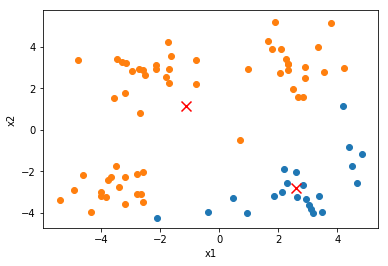

centroids:
 [[ 2.59258145 -2.78274655]
 [-1.12630774  1.13042276]]


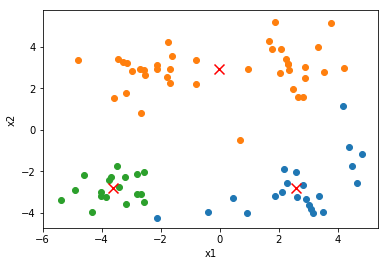

centroids:
 [[ 2.59258145 -2.78274655]
 [-0.00480723  2.9078739 ]
 [-3.61853111 -2.81946867]]


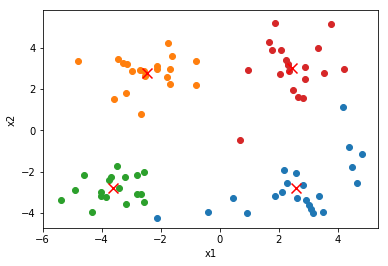

centroids:
 [[ 2.59258145 -2.78274655]
 [-2.46154315  2.78737555]
 [-3.61853111 -2.81946867]
 [ 2.4519287   3.02837225]]


In [784]:
k = 4
datas = load_data_set('testSet.txt')
centroids, clusterAssment = bis_k_means(datas, k, maxstep=100, debug=True)

## Use k mean alogrithm to split a pic

In [880]:
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np

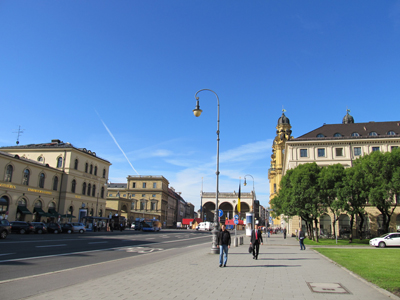

In [740]:
im = Image.open('./city.jpg')
im

In [814]:
im_array = np.array(im)
im_array = im_array.reshape(-1,3)

In [815]:
np.shape(im_array)

(120000, 3)

In [978]:
im_centroids, im_clusterAssment = k_means(im_array, 2, maxstep=100, debug=True)

step: 1, distance:14139612.591102777
step: 2, distance:8445806.885139866
step: 3, distance:7387537.678383225
step: 4, distance:6946593.288856403
step: 5, distance:6958588.147788707
step: 6, distance:6962500.169815566
step: 7, distance:6963448.43779929
step: 8, distance:6963702.919182175
step: 9, distance:6963724.613057888
step: 10, distance:6963737.683001391


In [979]:
im_centroids

array([[ 110.19100568,  149.9640392 ,  203.2222196 ],
       [  75.87203008,   77.48877557,   62.83528004]])

In [980]:
len(im_clusterAssment[im_clusterAssment[:, 0] == 1])

35102

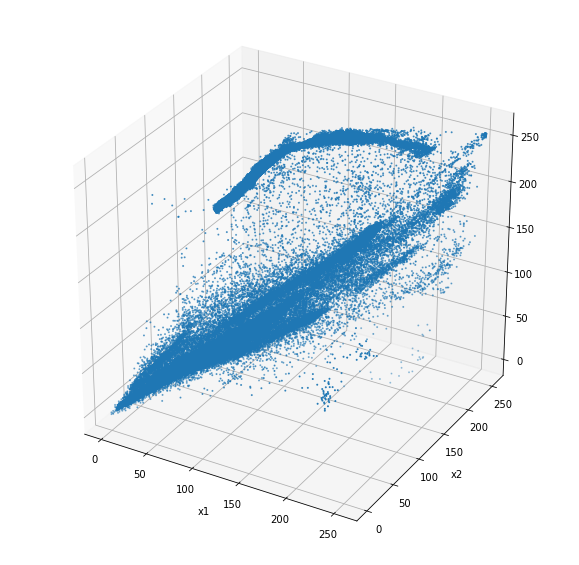

In [981]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(im_array[:, 0], im_array[:, 1], im_array[:, 2], s=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [982]:
def plot_cluster_3d(datas, clusterAssment, centroids):
    k = len(centroids)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        ax.scatter(datas[clusterAssment[:, 0] == i, 0], datas[clusterAssment[:, 0] == i, 1],\
                   datas[clusterAssment[:, 0] == i, 2], s=0.1)
        ax.scatter(centroids[i, 0], centroids[i, 1], centroids[i, 2], marker='x', c='r', s=500)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

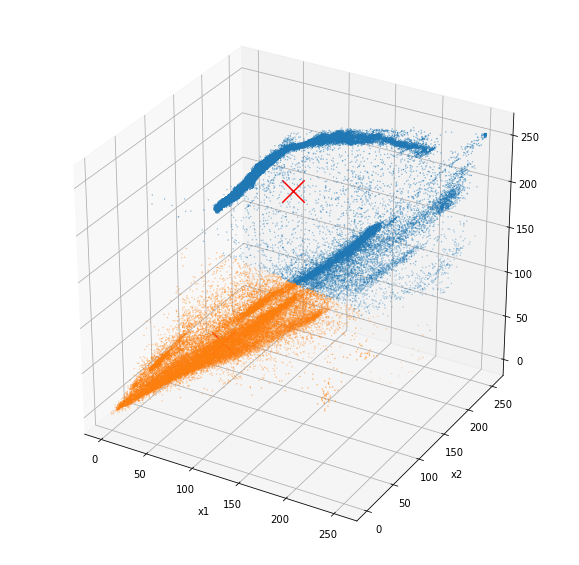

In [983]:
plot_cluster_3d(im_array, im_clusterAssment, im_centroids)

In [993]:
im_split0_array = im_array.copy()
im_split1_array = im_array.copy()

im_split0_array[im_clusterAssment[:, 0] == 0] = 255
im_split1_array[im_clusterAssment[:, 0] == 1] = 255

In [989]:
im_split0 = im_split0_array.reshape(300, 400, -1)
im_split1 = im_split1_array.reshape(300, 400, -1)

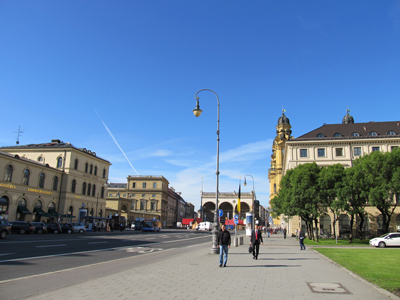

In [990]:
Image.fromarray(im_array.reshape(300, 400, -1))

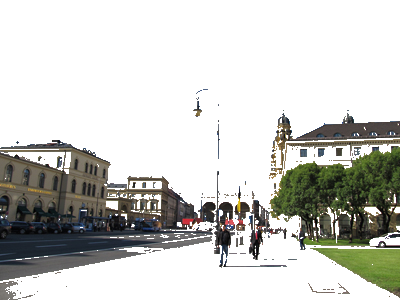

In [991]:
Image.fromarray(im_split0)

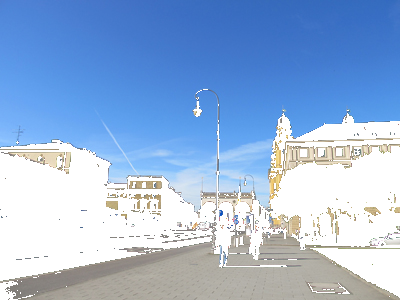

In [992]:
Image.fromarray(im_split1)

** it seems it can split the buildings and sky from the original image, we can try split it to 3 clusters **

In [1039]:
im_centroids, im_clusterAssment = bis_k_means(im_array, 3, maxstep=100)

In [1040]:
im_split0_array = im_array.copy()
im_split1_array = im_array.copy()
im_split2_array = im_array.copy()

im_split0_array[im_clusterAssment[:, 0] == 1] = 255
im_split0_array[im_clusterAssment[:, 0] == 2] = 255

im_split1_array[im_clusterAssment[:, 0] == 0] = 255
im_split1_array[im_clusterAssment[:, 0] == 2] = 255

im_split2_array[im_clusterAssment[:, 0] == 0] = 255
im_split2_array[im_clusterAssment[:, 0] == 1] = 255

im_split0 = im_split0_array.reshape(300, 400, -1)
im_split1 = im_split1_array.reshape(300, 400, -1)
im_split2 = im_split2_array.reshape(300, 400, -1)

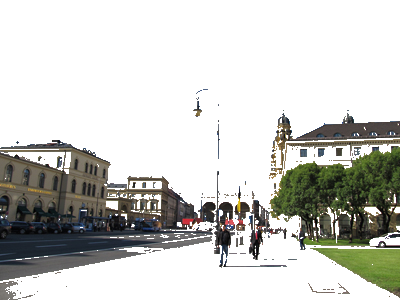

In [1041]:
Image.fromarray(im_split0)

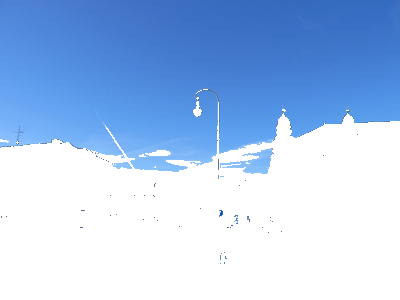

In [1042]:
Image.fromarray(im_split1)

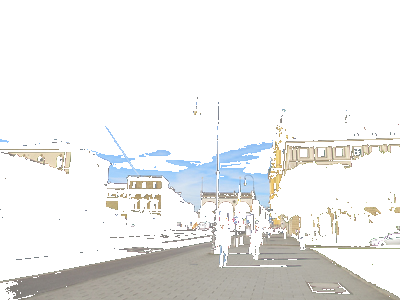

In [1043]:
Image.fromarray(im_split2)